In [1]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

# I/ Import des données

## Split des données

In [114]:
chunk = pd.read_csv("data/en.openfoodfacts.org.products.csv",sep="\t", encoding='utf-8', low_memory=False, chunksize=100000)

In [151]:
# Dataset de 200k ligne pour débuter
df=chunk.get_chunk(800000)

In [155]:
df.to_csv("data_chunk800K.csv")

In [150]:
df.loc[:,columns].describe()

energy-kcal_100g       fat_100g  saturated-fat_100g    sugars_100g   
count      5.789910e+05  595860.000000       596084.000000  595652.000000  \
mean       5.835083e+04      14.531795            5.766679      12.026788   
std        4.419366e+07      29.678459            8.969254      20.497523   
min       -1.000000e+00       0.000000            0.000000     -17.000000   
25%        1.150000e+02       1.400000            0.300000       0.500000   
50%        2.480000e+02       8.600000            2.200000       2.400000   
75%        3.890000e+02      23.000000            8.500000      14.000000   
max        3.362760e+10   16908.000000         1405.000000    3750.000000   

       proteins_100g    sodium_100g     fiber_100g   
count  596994.000000  553636.000000  182547.000000  \
mean       10.105718       0.560196       3.120893   
std        27.004704       6.267839      26.934325   
min       -19.000000       0.000000       0.000000   
25%         2.300000       0.040000       0.010000   
50%         7.100000       0.280000       1.500000   
75%        16.000000       0.600000       3.500000   
max     16908.000000    2228.860000   10000.000000   

       fruits-vegetables-nuts-estimate-from-ingredients_100g   
count                                      229461.000000      \
mean                                           12.803344       
std                                            37.472570       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             9.500000       
max                                          7022.000000       

       carbohydrates_100g  
count       594768.000000  
mean            23.401986  
std             37.925204  
min              0.000000  
25%              1.400000  
50%             10.400000  
75%             45.500000  
max          16908.000000

In [153]:
len(df.columns.to_list())

201

## Analyse répartition des classes à prédire

In [116]:
sns.histplot(df["nutriscore_grade"])

<Axes: xlabel='nutriscore_grade', ylabel='Count'>

In [147]:
df["nutriscore_grade"].value_counts()

nutriscore_grade
d    99378
c    63516
e    56039
a    45385
b    42878
Name: count, dtype: int64

# II/ Nettoyage des données

## Nettoyage colonnes

In [117]:
columns = ["energy-kcal_100g","nutriscore_grade", "fat_100g", "saturated-fat_100g", "sugars_100g", "proteins_100g", "sodium_100g", "fiber_100g", "fruits-vegetables-nuts-estimate-from-ingredients_100g", "carbohydrates_100g"]
df2= df.loc[:,columns]

## Nettoyage valeurs NaN

In [118]:
#Drop NaN nutriscore
indexName = df2[(df2["nutriscore_grade"].isnull())].index
df2.drop(indexName,inplace=True)

In [119]:
#Drop NaN nutriscore
indexName = df2[(df2["energy-kcal_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [120]:
indexName = df2[(df2["saturated-fat_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [121]:
indexName = df2[(df2["fat_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [122]:
indexName = df2[(df2["sugars_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [123]:
indexName = df2[(df2["proteins_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [124]:
indexName = df2[(df2["sodium_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [125]:
indexName = df2[(df2["fiber_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [126]:
indexName = df2[(df2["fruits-vegetables-nuts-estimate-from-ingredients_100g"].isnull())].index
df2.drop(indexName,inplace=True)

In [127]:
indexName = df2[(df2["carbohydrates_100g"].isnull())].index
df2.drop(indexName,inplace=True)

## Nettoyage valeurs abérantes

In [128]:
#Drop valeur abérantes energies
indexName = df2[((df2["energy-kcal_100g"]-df2["energy-kcal_100g"].mean())/df2["energy-kcal_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [129]:
#Drop valeur abérantes fat
indexName = df2[((df2["fat_100g"]-df2["fat_100g"].mean())/df2["fat_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [130]:
#Drop valeur abérantes saturates fat
indexName = df2[((df2["saturated-fat_100g"]-df2["saturated-fat_100g"].mean())/df2["saturated-fat_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [131]:
#Drop valeur abérantes sugars
indexName = df2[((df2["sugars_100g"]-df2["sugars_100g"].mean())/df2["sugars_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [132]:
indexName = df2[((df2["proteins_100g"]-df2["proteins_100g"].mean())/df2["proteins_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [133]:
#Drop valeur abérantes sodium
indexName = df2[((df2["sodium_100g"]-df2["sodium_100g"].mean())/df2["sodium_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [134]:
#Drop valeur abérantes sodium
indexName = df2[((df2["fiber_100g"]-df2["fiber_100g"].mean())/df2["fiber_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [135]:
#Drop valeur abérantes sodium
indexName = df2[((df2["fruits-vegetables-nuts-estimate-from-ingredients_100g"]-df2["fruits-vegetables-nuts-estimate-from-ingredients_100g"].mean())/df2["fruits-vegetables-nuts-estimate-from-ingredients_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [136]:
indexName = df2[((df2["carbohydrates_100g"]-df2["carbohydrates_100g"].mean())/df2["carbohydrates_100g"].std())>=3].index
df2.drop(indexName,inplace=True)

In [137]:
df2.describe()

energy-kcal_100g       fat_100g  saturated-fat_100g    sugars_100g   
count     217427.000000  217427.000000       217427.000000  217427.000000  \
mean         270.604739      12.100063            4.190126      13.746882   
std          170.270942      13.081088            5.475193      17.025409   
min            0.000000       0.000000            0.000000       0.000000   
25%          106.000000       0.930000            0.000000       1.454927   
50%          271.000000       7.500000            1.785714       5.260000   
75%          400.000000      20.165571            6.670000      22.220000   
max          818.000000      57.890000           22.730000      71.500000   

       proteins_100g    sodium_100g     fiber_100g   
count  217427.000000  217427.000000  217427.000000  \
mean        7.635432       0.556416       2.334037   
std         7.239832       5.423702       2.956049   
min         0.000000       0.000000       0.000000   
25%         2.420000       0.066840       0.000000   
50%         5.710000       0.301040       1.310000   
75%        10.710000       0.567000       3.571429   
max        36.600000     719.666328      15.555556   

       fruits-vegetables-nuts-estimate-from-ingredients_100g   
count                                      217427.000000      \
mean                                            3.065764       
std                                             8.532947       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                            56.000000       

       carbohydrates_100g  
count       217427.000000  
mean            33.632634  
std             27.235169  
min              0.000000  
25%              8.000000  
50%             25.880000  
75%             58.270000  
max            100.000000

In [72]:
sns.heatmap(df2.corr())

ValueError: could not convert string to float: 'b'

# III/ Modèle

In [138]:
from sklearn.model_selection import train_test_split

X= df2.loc[:,["energy-kcal_100g", "fat_100g", "saturated-fat_100g", "proteins_100g","sugars_100g", "sodium_100g", "fiber_100g", "fruits-vegetables-nuts-estimate-from-ingredients_100g", "carbohydrates_100g"]]
y= pd.DataFrame(df2["nutriscore_grade"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Oversampling

In [139]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)
X_res, y_res = X_train, y_train

In [146]:
y_train.value_counts()

nutriscore_grade
d                   62006
c                   41638
e                   35094
b                   29046
a                   27900
Name: count, dtype: int64

<Axes: xlabel='nutriscore_grade', ylabel='Count'>

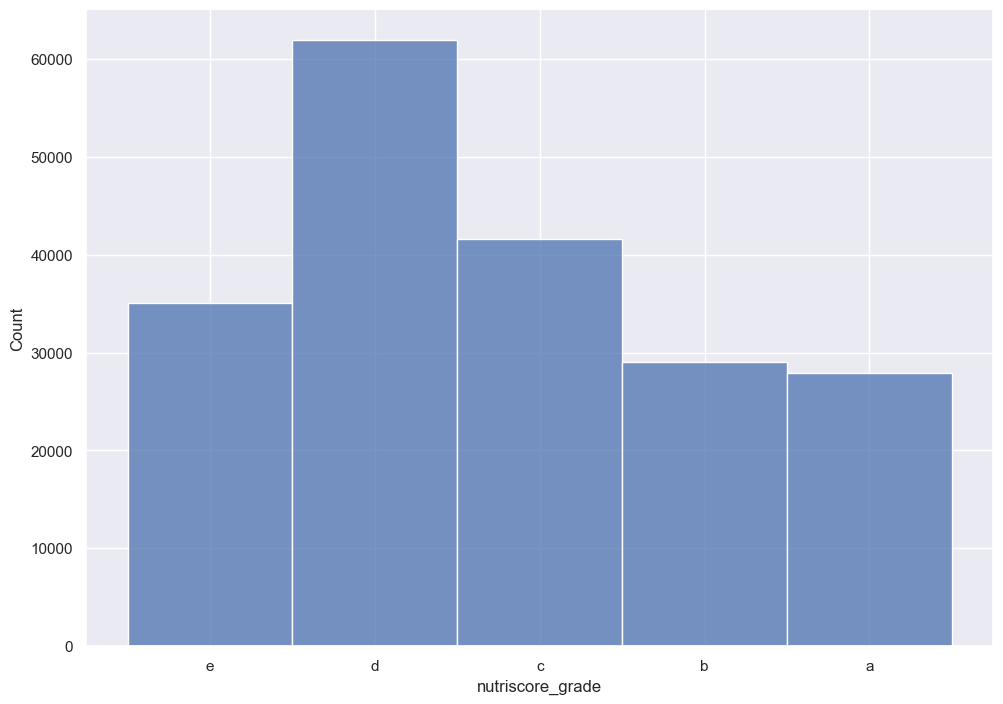

In [154]:
sns.histplot(y_res["nutriscore_grade"])

## Pipeline Scikit-learn

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

rf = Pipeline(
  steps=[
    ('scale', StandardScaler()),
    ('classifier', LogisticRegression())
  ]
)

In [142]:
rf.fit(X_res, y_res)

/Users/merouanedebot/.local/share/virtualenvs/Projet_E2-vg7lNDNZ/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merouanedebot/.local/share/virtualenvs/Projet_E2-vg7lNDNZ/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', LogisticRegression())])

## Evaluation

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

test = rf.predict(X_test)

print(classification_report(y_test, test))

              precision    recall  f1-score   support

           a       0.80      0.77      0.78      3121
           b       0.56      0.64      0.60      3240
           c       0.60      0.57      0.58      4471
           d       0.66      0.74      0.70      6924
           e       0.75      0.59      0.66      3987

    accuracy                           0.66     21743
   macro avg       0.68      0.66      0.66     21743
weighted avg       0.67      0.66      0.66     21743



In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

test = rf.predict(X_test)

print(classification_report(y_test, test))

              precision    recall  f1-score   support

           a       0.83      0.82      0.82       146
           b       0.54      0.58      0.56        99
           c       0.60      0.72      0.66       138
           d       0.69      0.62      0.65       188
           e       0.67      0.58      0.62        99

    accuracy                           0.67       670
   macro avg       0.67      0.66      0.66       670
weighted avg       0.68      0.67      0.67       670



In [110]:
print("train : ", rf.score(X_res, y_res))
print("test : ", rf.score(X_test, y_test))

train :  0.6688257764490948
test :  0.6716417910447762


## Test prédiction

In [111]:
prediction = [[397,10,4.2,11,9.1,0.08,9.5,0,61]]
rf.predict(prediction)

/Users/merouanedebot/.local/share/virtualenvs/Projet_E2-vg7lNDNZ/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['a'], dtype=object)

## Export model

In [35]:
from joblib import dump

dump(rf, "pipeline_model_nutriscore.joblib")

['pipeline_model_nutriscore.joblib']

In [144]:
len(X_res)

195684

In [38]:
len(X)

217427

code                       0
url                        0
creator                    0
created_t                  0
created_datetime           0
                       ...  
choline_100g          799993
phylloquinone_100g    798331
beta-glucan_100g      800000
inositol_100g         799989
carnitine_100g        800000
Length: 201, dtype: int64